In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse.linalg._interface import MatrixLinearOperator, _CustomLinearOperator
import scipy.sparse as sps


# Linear operator for Kronecker product?

In [26]:
class KroneckerProductOperator(_CustomLinearOperator):
    """Represents the kronecker product of linear operators X and Y.
    """

    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

        self.m1, self.n1 = self.X.shape      
        self.m2, self.n2 = self.Y.shape  

        # Build matvec and rmatvec
        def _matvec(x):
            Xtilde = x.reshape((self.n2, self.n1))
            B = self.Y @ ( Xtilde @ self.X.T)
            return B.flatten()
        
        def _rmatvec(x):
            Xtilde = x.reshape((self.m2, self.m1))
            B = self.Y.T @ (Xtilde @ self.X)
            return B.flatten()
        
        super().__init__( (self.m1*self.m2, self.n1*self.n2), _matvec, _rmatvec )



In [29]:
import numpy as np
from scipy.sparse.linalg import LinearOperator

class KroneckerProductLinearOperator(LinearOperator):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.shape = (X.shape[0] * Y.shape[0], X.shape[1] * Y.shape[1])
        super(KroneckerProductLinearOperator, self).__init__(dtype=np.dtype(X.dtype), shape=self.shape)

    def _matvec(self, v):
        v = v.reshape(self.Y.shape[1], self.X.shape[1])
        result = np.kron(self.X, self.Y @ v)
        return result.ravel()

    def _rmatvec(self, v):
        v = v.reshape(self.X.shape[0], self.Y.shape[0])
        result = np.kron(v @ self.Y.T, self.X)
        return result.ravel()

# # Example usage:
# X = np.array([[1, 2], [3, 4]])
# Y = np.array([[5, 6], [7, 8]])

# KP = KroneckerProductLinearOperator(X, Y)


In [32]:
# Build random matrix
m1, n1 = 3, 5
m2, n2 = 4, 7

np.random.seed(0)
X = np.random.normal(size=(m1, n1))
Y = np.random.normal(size=(m2, n2))

# Make Kronecker operator
K = KroneckerProductOperator(X, Y)

# Random vector
z = np.random.normal(size=(n1*n2,))

b = K @ z

# Numpy Kronecker
Knp = np.kron(X, Y)

bnp = Knp @ z


# GPT 
Kgpt = KroneckerProductLinearOperator(X, Y)
bgpt = Kgpt @ z

# print(np.linalg.norm(b - bnp))

ValueError: cannot reshape array of size 300 into shape (12,)

In [74]:
k, n = 20, 6

errors = []
n_samples = 1000
for j in range(n_samples):
    R = np.random.normal(size=(20,6))
    d = np.random.uniform(low=1, high=2, size=20)
    D = np.diag(1.0/d)
    pinv = np.linalg.pinv(D @ R)

    Rpinv = np.linalg.pinv(R)
    guess = Rpinv @ np.diag(d)

    errors.append(np.linalg.norm(pinv - guess))

    # print(np.linalg.norm(pinv - guess))

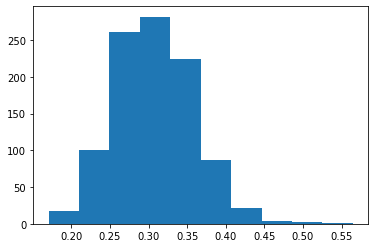

In [75]:
plt.hist(errors)
plt.show()

In [76]:
np.linalg.norm((R @ Rpinv @ R) - R )

7.229058757592255e-15

In [77]:
np.linalg.norm((Rpinv @ R @ Rpinv) - Rpinv )

4.482098673693304e-16

In [112]:
R = np.random.normal(size=(20,6))
d = np.random.uniform(low=1, high=20, size=20)
D = np.diag(1.0/d)
pinv = np.linalg.pinv(D @ R)

Rpinv = np.linalg.pinv(R)
guess = Rpinv @ np.diag(d)

In [113]:
A = D @ R
Apinv = guess
np.linalg.norm((A @ Apinv @ A) - A)

2.0963060976928495e-15

In [114]:
np.linalg.norm((Apinv @ A @ Apinv) - Apinv)

6.62370057944469e-15

In [115]:
np.linalg.norm( (A @ Apinv).T.conj() - (A @ Apinv) )

7.290733633223738

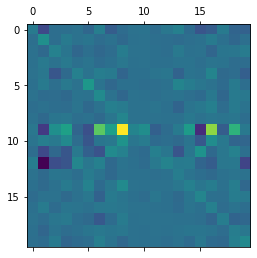

In [116]:
plt.matshow(A @ Apinv)
plt.show()

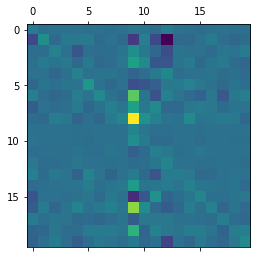

In [117]:
plt.matshow( (A @ Apinv).conj().T ) 
plt.show()

In [118]:
np.linalg.norm( (Apinv @ A).T.conj() - (Apinv @ A) )

1.608903959566969e-15

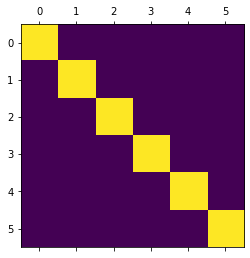

In [119]:
plt.matshow( (Apinv @ A).conj().T ) 
plt.show()

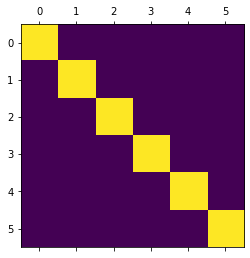

In [120]:
plt.matshow(Apinv @ A)
plt.show()